# PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn

In [2]:
print (sklearn.__version__)

0.19.1


In [3]:
def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a

### 数据说明

|    en      | zh    |
| :--------: |:-----:|
|sepal_length|花萼长度|
|sepal_width |花萼宽度|
|petal_length|花瓣长度|
|petal_width |花瓣宽度|
|class       |类别|

In [4]:
iris_data = pd.read_csv('iris.data', header=None)
# print (iris_data)
columns = np.array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris_data.rename(columns=dict(zip(np.arange(5), columns)), inplace=True)
iris_data['class'] = pd.Categorical(iris_data['class']).codes
print (iris_data[0:5])

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


### load_data

In [5]:
X = iris_data[columns[0:-1]]
y = iris_data[columns[-1]]

 
### PCA参数说明：


- n_components:
  - 意义：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n
  - 类型：int 或者 string，缺省时默认为None，所有成分被保留。赋值为int，比如n_components=1，将把原始数据降到一个维度。赋值为string，比如n_components='mle'，将自动选取特征个数n，使得满足所要求的方差百分比。
     
     
- copy:
  - 类型：bool，True或者False，缺省时默认为True。
  - 意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进 行运算；若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。
  
  
- whiten:
  - 类型：bool，缺省时默认为False
  - 意义：白化，使得每个特征具有相同的方差。关于“白化”，
  - 参考：http://deeplearning.stanford.edu/wiki/index.php/%E7%99%BD%E5%8C%96

  
- svd_solver：
  - 即指定奇异值分解SVD的方法，由于特征分解是奇异值分解SVD的一个特例，一般的PCA库都是基于SVD实现的。
  - 有4个可以选择的值：{‘auto’, ‘full’, ‘arpack’, ‘randomized’}。randomized一般适用于数据量大，数据维度多同时主成分数目比例又较低的PCA降维，它使用了一些加快SVD的随机算法。 full则是传统意义上的SVD，使用了scipy库对应的实现。arpack和randomized的适用场景类似，区别是randomized使用的是scikit-learn自己的SVD实现，而arpack直接使用了scipy库的sparse SVD实现。默认是auto，即PCA类会自己去在前面讲到的三种算法里面去权衡，选择一个合适的SVD算法来降维。一般来说，使用默认值就够了。


- random_state:
  - 如果是int，random_state是随机数发生器使用的种子; 如果是RandomState实例，random_state是随机数生成器;



### PCA对象的方法：

- fit(X,y=None)：

fit()可以说是scikit-learn中通用的方法，每个需要训练的算法都会有fit()方法，它其实就是算法中的“训练”这一步骤。
因为PCA是无监督学习算法，此处y自然等于None。fit(X)，表示用数据X来训练PCA模型。
函数返回值：调用fit方法的对象本身。比如pca.fit(X)，表示用X对pca这个对象进行训练。

- fit_transform(X)：

用X来训练PCA模型，同时返回降维后的数据。
newX=pca.fit_transform(X)，newX就是降维后的数据。

- inverse_transform()：

将降维后的数据转换成原始数据，X=pca.inverse_transform(newX)

- transform(X)：

将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。

- 此外，还有get_covariance()、get_precision()、get_params(deep=True)、score(X, y=None)等方法。


In [6]:
method = 'pca'

if method == "pca":
    pca = PCA(n_components=2, whiten=True, random_state=0)
    x = pca.fit_transform(X)
    print ('The composition of the largest variance:', pca.components_)
    print ('Variance in all directions:', pca.explained_variance_)
    print ('The proportion of variance:', pca.explained_variance_ratio_)
    x1_label, x2_label = 'PC1', 'PC2'
    title = 'PCA Dimensionality reduction'
else:
    fs = SelectKBest(chi2, k=2)
    fs.fit(X, y)
    idx = fs.get_support(indices=True)
    print ('fs.get_support() = ', idx)
    x = X[idx]
    x = x.values  # 为下面使用方便，DataFrame转换成ndarray
    x1_label, x2_label = columns[idx]
    title = 'Feature selection'
print (x[:5])

The composition of the largest variance: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Variance in all directions: [ 4.22484077  0.24224357]
The proportion of variance: [ 0.92461621  0.05301557]
[[-1.3059028   0.66358991]
 [-1.32107398 -0.34449998]
 [-1.405936   -0.27905426]
 [-1.33617856 -0.63213207]
 [-1.32749711  0.67845686]]


In [7]:
# 预测值
cm_light = mpl.colors.ListedColormap(['#FFF68F', '#EEEEE0', '#BCEE68'])
# 实际值
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

### 绘制散点图

- `x[:, 0], x[:, 1]`相当于`x，y`坐标

- `c`是色彩或颜色序列

- `True` 显示网格

- `linestyle` 设置线显示的类型(一共四种)

- `color` 设置网格的颜色

- `linewidth` 设置网格的宽度



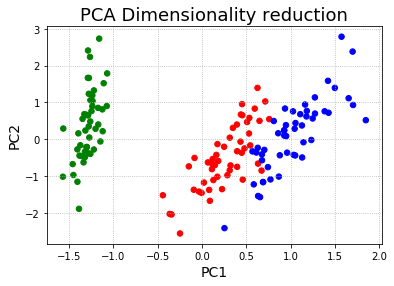

In [8]:
plt.figure(facecolor='w')
#plt.scatter(X[u'花萼长度'][:], X[u'花萼宽度'][:], s=30, c=y, marker='o', cmap=cm_dark)
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark)

plt.grid(b=True, ls=':')
plt.xlabel(x1_label, fontsize=14)
plt.ylabel(x2_label, fontsize=14)
plt.title(title, fontsize=18)
# plt.savefig('1.png')
plt.show()

随机切分训练数据和测试数据

每次运行的结果会不同

In [9]:
x, x_test, y, y_test = train_test_split(x, y, train_size=0.7)
model = Pipeline([
    ('poly', PolynomialFeatures(degree=4, include_bias=True)),
    ('lr', LogisticRegressionCV(Cs=np.logspace(-3, 4, 8), cv=5, fit_intercept=False))
])
model.fit(x, y)
# get_params() 取出之前定义的参数
print ('Optimal parameters:', model.get_params('lr')['lr'].C_)
y_hat = model.predict(x)
print ('Training set accuracy:', metrics.accuracy_score(y, y_hat))
y_test_hat = model.predict(x_test)
print ('Test set accuracy:', metrics.accuracy_score(y_test, y_test_hat))

/home/wukuan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Optimal parameters: [ 0.001  1.     1.   ]
Training set accuracy: 0.980952380952
Test set accuracy: 0.911111111111


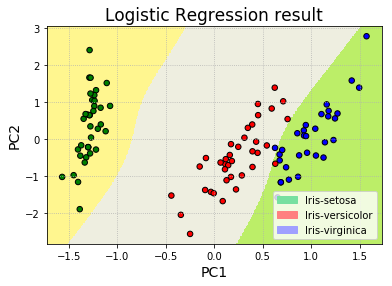

In [10]:
N, M = 500, 500                                         # 横纵各采样多少个值
x1_min, x1_max = extend(x[:, 0].min(), x[:, 0].max())   # 第0列的范围
x2_min, x2_max = extend(x[:, 1].min(), x[:, 1].max())   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)   # 测试点
y_hat = model.predict(x_show)                   # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)    # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, edgecolors='k', cmap=cm_dark)  # 样本的显示
plt.xlabel(x1_label, fontsize=14)
plt.ylabel(x2_label, fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(b=True, ls=':')
# 画各种图
# a = mpl.patches.Wedge(((x1_min+x1_max)/2, (x2_min+x2_max)/2), 1.5, 0, 360, width=0.5, alpha=0.5, color='r')
# plt.gca().add_patch(a)
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
            mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
            mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8, loc='lower right')
plt.title('Logistic Regression result', fontsize=17)
plt.show()